## Classifying image using CNN method 

In [ ]:
from tensorflow.keras.datasets.fashion_mnist import load_data
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

4422102/4422102 [==============================] - 1s 0us/step


| Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

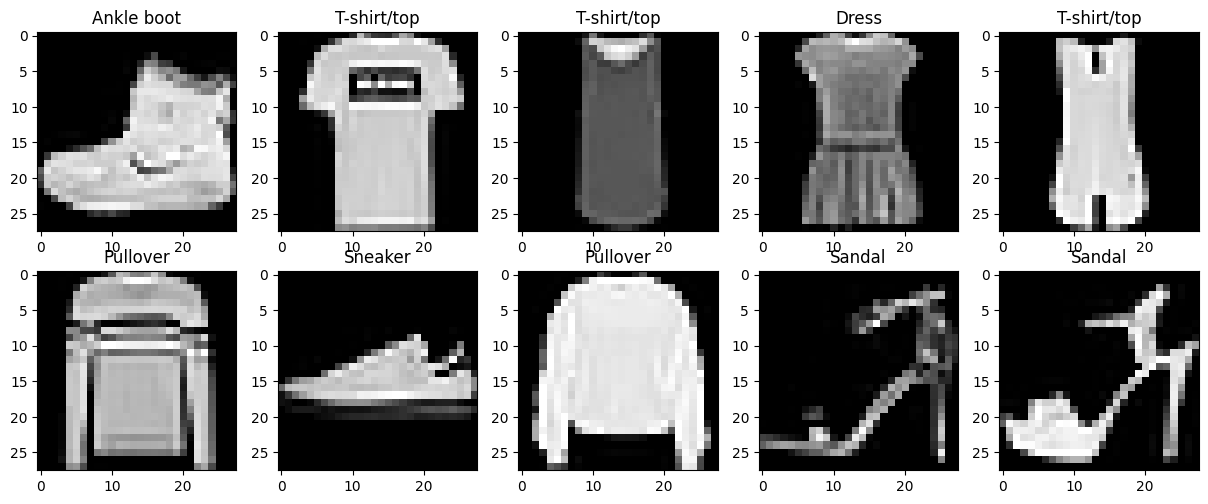

In [34]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
plt.show()

### Data Preparation

In [35]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [36]:
y_train[2]

0

In [37]:
y_train_ohe[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
 

x_train = x_train.reshape(60000, 28, 28, 1).astype("float")
x_test = x_test.reshape(10000, 28, 28, 1).astype("float")

In [39]:
x_train.dtype

dtype('float64')

### Model Building

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Flatten

- Increase the LR or Train for Longer increase epochs
- Add more conv layers
- #Kernels
- Size of the Kernel
- If Overfitting
    - Dropout
    - Regularizers
- Normalize / Min Max scaling data

In [41]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation("relu"))
# model.add(Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [42]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
model.fit(x=x_train, 
          y=y_train_ohe, 
          batch_size=1000,
          validation_data=(x_test, y_test_ohe),
          epochs=30)

Epoch 1/30
60/60 [==============================] - 4s 72ms/step - loss: 65.5011 - accuracy: 0.4285 - val_loss: 14.8833 - val_accuracy: 0.6546
Epoch 2/30
60/60 [==============================] - 4s 68ms/step - loss: 11.4627 - accuracy: 0.6982 - val_loss: 9.5830 - val_accuracy: 0.7039
Epoch 3/30
60/60 [==============================] - 4s 67ms/step - loss: 7.8937 - accuracy: 0.7410 - val_loss: 7.0995 - val_accuracy: 0.7441
Epoch 4/30
60/60 [==============================] - 4s 66ms/step - loss: 6.1252 - accuracy: 0.7654 - val_loss: 5.8502 - val_accuracy: 0.7626
Epoch 5/30
60/60 [==============================] - 4s 73ms/step - loss: 5.0959 - accuracy: 0.7820 - val_loss: 5.1084 - val_accuracy: 0.7723
Epoch 6/30
60/60 [==============================] - 4s 69ms/step - loss: 4.3715 - accuracy: 0.7921 - val_loss: 4.4746 - val_accuracy: 0.7858
Epoch 7/30
60/60 [==============================] - 4s 69ms/step - loss: 3.8678 - accuracy: 0.8014 - val_loss: 4.1061 - val_accuracy: 0.7927
Epoch 8/30

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (1000, 26, 26, 3)         30        
_________________________________________________________________
activation_1 (Activation)    (1000, 26, 26, 3)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (1000, 13, 13, 3)         0         
_________________________________________________________________
flatten_1 (Flatten)          (1000, 507)               0         
_________________________________________________________________
dense_1 (Dense)              (1000, 10)                5080      
Total params: 5,110
Trainable params: 5,110
Non-trainable params: 0
_________________________________________________________________


In [44]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

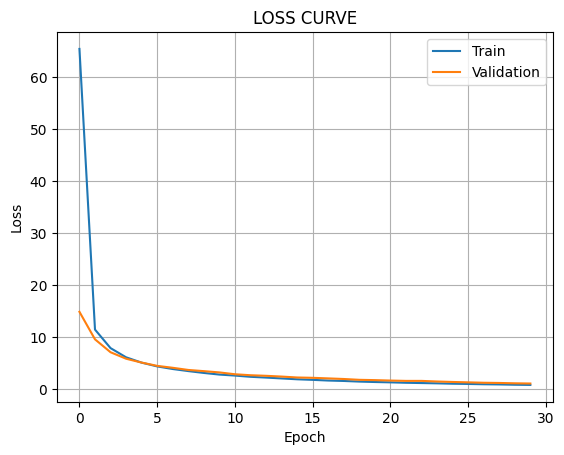

In [45]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

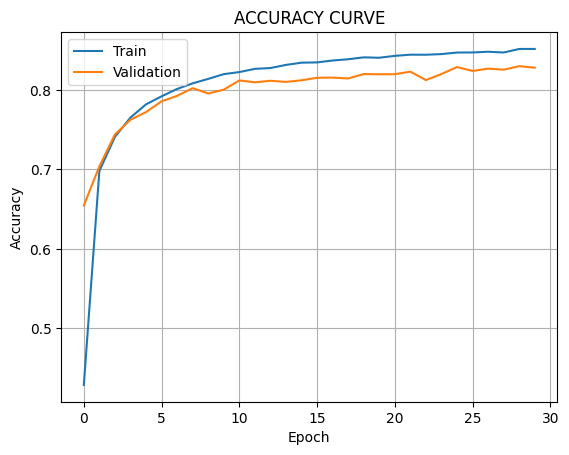

In [46]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

### Predictions

In [52]:
import numpy as np

In [51]:
preds = model.predict(x_test)

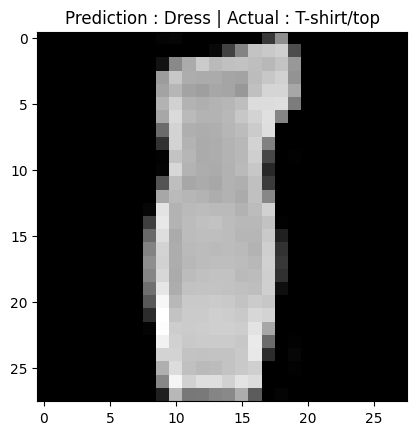

In [62]:
n = 1111
plt.imshow(x_test[n].reshape(28,28), cmap="gray")
plt.title(f"Prediction : {class_names[np.argmax(preds[n])]} | Actual : {class_names[y_test[n]]}")
plt.show()